# <font color=green>IMPORTANDO BIBLIOTECAS</font>
***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

# <font color=green>ANÁLISE DE UMA ÚNICA ATRAÇÃO</font>
***

## <font color=green>CARREGANDO O DATASET</font>
***

### <font color=green>Lendo arquivo .csv</font>
***

In [32]:
dados_df = pd.read_csv('rock_n_rollercoaster.csv')

### <font color=green>Visualizando o dataset original</font>
***

In [33]:
dados_df.head(10)

,date,datetime,SACTMIN,SPOSTMIN
0,01/01/2015,2015-01-01 07:46:22,NaN,5.0
1,01/01/2015,2015-01-01 07:53:19,NaN,5.0
2,01/01/2015,2015-01-01 08:04:29,NaN,20.0
3,01/01/2015,2015-01-01 08:11:19,NaN,20.0
4,01/01/2015,2015-01-01 08:16:29,NaN,20.0
5,01/01/2015,2015-01-01 08:18:22,NaN,20.0
6,01/01/2015,2015-01-01 08:24:23,19.0,NaN
7,01/01/2015,2015-01-01 08:24:37,NaN,20.0
8,01/01/2015,2015-01-01 08:25:19,NaN,20.0
9,01/01/2015,2015-01-01 08:27:37,NaN,30.0


In [34]:
dados_df.tail(10)

,date,datetime,SACTMIN,SPOSTMIN
214836,12/31/2019,2019-12-31 22:51:02,NaN,45.0
214837,12/31/2019,2019-12-31 22:58:02,NaN,45.0
214838,12/31/2019,2019-12-31 23:09:02,NaN,35.0
214839,12/31/2019,2019-12-31 23:16:02,NaN,35.0
214840,12/31/2019,2019-12-31 23:23:02,NaN,35.0
214841,12/31/2019,2019-12-31 23:30:02,NaN,35.0
214842,12/31/2019,2019-12-31 23:37:02,NaN,-999.0
214843,12/31/2019,2019-12-31 23:44:02,NaN,-999.0
214844,12/31/2019,2019-12-31 23:51:02,NaN,-999.0
214845,12/31/2019,2019-12-31 23:58:02,NaN,-999.0


In [35]:
type(dados_df.datetime[5])

str

## <font color=green>TRATANDO O DATASET ORIGINAL</font>
***

### <font color=green>Removendo coluna SACTMIN</font>
***

In [36]:
dados_df.drop(columns = ['SACTMIN'], inplace = True)

### <font color=green>Removendo dados ausentes</font>
***

In [37]:
dados_df.dropna(inplace= True)

### <font color=green>Filtro para selecionar valores maiores ou iguais à zero</font>
***

In [38]:
filtro = dados_df['SPOSTMIN'] >= 0 

### <font color=green>Aplicando o filtro para excluir valores iguais a -999</font>
***

In [39]:
dados_df = dados_df[filtro]

### <font color=green>Transforma os valores de 'date' de strings para datetime</font>
***

In [40]:
dados_df['data_e_hora'] = pd.to_datetime(dados_df['datetime'])

### <font color=green>Cria a coluna 'tempo_de_fila'</font>
***

In [41]:
dados_df['tempo_de_fila'] = dados_df['SPOSTMIN']

### <font color=green>Remove as colunas 'SPOTMIN', 'date' e 'datetime'</font>
***

In [42]:
dados_df.drop(columns = ['SPOSTMIN', 'date', 'datetime'], inplace = True)

### <font color=green>Reseta o índice</font>
***

In [43]:
dados_df = dados_df.reset_index(drop = True)

### <font color=green>Visualizando início, final e tamanho do dataframe tratado</font>
***

In [44]:
dados_df.head(15)

,data_e_hora,tempo_de_fila
0,2015-01-01 07:46:22,5.0
1,2015-01-01 07:53:19,5.0
2,2015-01-01 08:04:29,20.0
3,2015-01-01 08:11:19,20.0
4,2015-01-01 08:16:29,20.0
5,2015-01-01 08:18:22,20.0
6,2015-01-01 08:24:37,20.0
7,2015-01-01 08:25:19,20.0
8,2015-01-01 08:27:37,30.0
9,2015-01-01 08:31:20,30.0


In [45]:
dados_df.tail(15)

,data_e_hora,tempo_de_fila
199361,2019-12-31 21:44:02,70.0
199362,2019-12-31 21:51:02,70.0
199363,2019-12-31 21:58:02,75.0
199364,2019-12-31 22:09:02,75.0
199365,2019-12-31 22:16:02,60.0
199366,2019-12-31 22:23:02,70.0
199367,2019-12-31 22:30:03,60.0
199368,2019-12-31 22:37:02,70.0
199369,2019-12-31 22:44:01,60.0
199370,2019-12-31 22:51:02,45.0


In [46]:
dados_df.shape

(199376, 2)

### <font color=green>Visualizando tipos das variáveis</font>
***

In [47]:
print(type(dados_df['data_e_hora'][5]))
print(type(dados_df['tempo_de_fila'][5]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>


## <font color=green>DATAFRAME BASE (Instantes listados de 5 em 5 minutos)</font>
***

### <font color=green>Criando o DataFrame com os horários normalizados de 5 em 5 minutos</font>
***

In [48]:
instantes_5_em_5 = pd.date_range(start='1/1/2015', periods = 525888, freq = '5min')

In [49]:
base_df = pd.DataFrame(index = range(0,525888), columns = ['data_e_hora', 'tempo_de_fila', 'apagar'])
base_df['data_e_hora'] = instantes_5_em_5
base_df['tempo_de_fila'] = 0
base_df['apagar'] = 0
base_df['observacao'] = base_df.index
base_df.set_index('observacao', inplace = True)

### <font color=green>Visualizando o início, o fim e o tamanho do DataFrame criado</font>
***

In [50]:
base_df.head(10)

,data_e_hora,tempo_de_fila,apagar
observacao,,,
0,2015-01-01 00:00:00,0,0
1,2015-01-01 00:05:00,0,0
2,2015-01-01 00:10:00,0,0
3,2015-01-01 00:15:00,0,0
4,2015-01-01 00:20:00,0,0
5,2015-01-01 00:25:00,0,0
6,2015-01-01 00:30:00,0,0
7,2015-01-01 00:35:00,0,0
8,2015-01-01 00:40:00,0,0


In [51]:
base_df.tail(10)

,data_e_hora,tempo_de_fila,apagar
observacao,,,
525878,2019-12-31 23:10:00,0,0
525879,2019-12-31 23:15:00,0,0
525880,2019-12-31 23:20:00,0,0
525881,2019-12-31 23:25:00,0,0
525882,2019-12-31 23:30:00,0,0
525883,2019-12-31 23:35:00,0,0
525884,2019-12-31 23:40:00,0,0
525885,2019-12-31 23:45:00,0,0
525886,2019-12-31 23:50:00,0,0


In [52]:
base_df.shape

(525888, 3)

### <font color=green>Criando coluna 'apagar' no dataframe de dados e atribuindo valores iguais a zero (não) a ela</font>
***

In [53]:
dados_df['apagar'] = 0

In [54]:
dados_df.shape

(199376, 3)

### <font color=green>Unindo os dataframes de dados e base</font>
***

In [55]:
dados_e_base_df = base_df.append(dados_df)
dados_e_base_df

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
199371,2019-12-31 22:58:02,45.0,0
199372,2019-12-31 23:09:02,35.0,0
199373,2019-12-31 23:16:02,35.0,0
199374,2019-12-31 23:23:02,35.0,0


### <font color=green>Ordenando o dataframe criado de acordo com a coluna 'data_e_hora'</font>
***

In [56]:
dados_e_base_df.sort_values(by=['data_e_hora'], inplace = True)

In [57]:
dados_e_base_df.reset_index(drop = True, inplace = True)

In [58]:
dados_e_base_df.head(10)

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
5,2015-01-01 00:25:00,0.0,0
6,2015-01-01 00:30:00,0.0,0
7,2015-01-01 00:35:00,0.0,0
8,2015-01-01 00:40:00,0.0,0
9,2015-01-01 00:45:00,0.0,0


### <font color=green>Selecionando quais linhas serão apagadas</font>
***

Aplica no dataframe 'dados_e_base_df' um filtro que leia cada linha, as duas anteriores e as duas seguintes. Se na linha lida, a coluna 'tempo_de_fila' for igual à zero e nas quatro outras linhas houver algum valor diferente de zero, a linha será apagada pelo filtro.

In [59]:
print('Estou lendo o dataframe dados + base. Como são muitas linhas e irei ler uma a uma, esse processo pode demorar um pouco!')
for i in range(0,len(dados_e_base_df)):
  if i != 0 and i != 1 and i != (len(dados_e_base_df) - 1) and i != (len(dados_e_base_df) - 2):
    if (dados_e_base_df.tempo_de_fila[i] == 0):
      c1 = (dados_e_base_df.tempo_de_fila[i + 1] != 0)
      c2 = (dados_e_base_df.tempo_de_fila[i - 1] != 0)
      c3 = (dados_e_base_df.tempo_de_fila[i + 2] != 0)
      c4 = (dados_e_base_df.tempo_de_fila[i - 2] != 0)
      if c1 or c2 or c3 or c4:
        dados_e_base_df.apagar[i] = 1
  if (i % 100000 == 0):
    print('Opa! Já li até a linha {}!! Mas ainda faltam {}!! Por favor, aguarde!'. format(i, (len(dados_e_base_df) - i)))
print('Pronto!! Terminei a leitura!!')

Estou lendo o dataframe dados + base. Como são muitas linhas e irei ler uma a uma, esse processo pode demorar um pouco!
Opa! Já li até a linha 0!! Mas ainda faltam 725264!! Por favor, aguarde!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Opa! Já li até a linha 100000!! Mas ainda faltam 625264!! Por favor, aguarde!
Opa! Já li até a linha 200000!! Mas ainda faltam 525264!! Por favor, aguarde!
Opa! Já li até a linha 300000!! Mas ainda faltam 425264!! Por favor, aguarde!
Opa! Já li até a linha 400000!! Mas ainda faltam 325264!! Por favor, aguarde!
Opa! Já li até a linha 500000!! Mas ainda faltam 225264!! Por favor, aguarde!
Opa! Já li até a linha 600000!! Mas ainda faltam 125264!! Por favor, aguarde!
Opa! Já li até a linha 700000!! Mas ainda faltam 25264!! Por favor, aguarde!
Pronto!! Terminei a leitura!!


In [60]:
dados_e_base_df.head(20)

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
5,2015-01-01 00:25:00,0.0,0
6,2015-01-01 00:30:00,0.0,0
7,2015-01-01 00:35:00,0.0,0
8,2015-01-01 00:40:00,0.0,0
9,2015-01-01 00:45:00,0.0,0


In [61]:
filtro2 = dados_e_base_df['apagar'] == 0

In [62]:
dados_e_base_df = dados_e_base_df[filtro2]

In [63]:
dados_e_base_df.shape

(455496, 3)

## <font color=green>INTERPOLAÇÃO DOS TEMPOS DE FILA</font>
***

In [64]:
X_interp = base_df.data_e_hora
X = dados_e_base_df.data_e_hora
Y = dados_e_base_df.tempo_de_fila
Y_interp = np.interp(X_interp, X, Y)

In [65]:
Y_interp.shape

(525888,)

In [66]:
base_df.tempo_de_fila = np.around(Y_interp, decimals = 0)

In [67]:
base_df.tempo_de_fila[481778]

288.0

In [68]:
type(base_df.tempo_de_fila[10])

numpy.float64

## <font color=green>GRÁFICO DO TEMPO DE FILA EM 'N' DATAS SELECIONADAS PELO USUÁRIO</font>
***


Quandos dias gostaria de analisar?5
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 1
Mês: 1
Ano: 2015
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 5
Mês: 8
Ano: 2016
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 4
Mês: 7
Ano: 2017
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 25
Mês: 12
Ano: 2018
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 4
Mês: 5
Ano: 2019


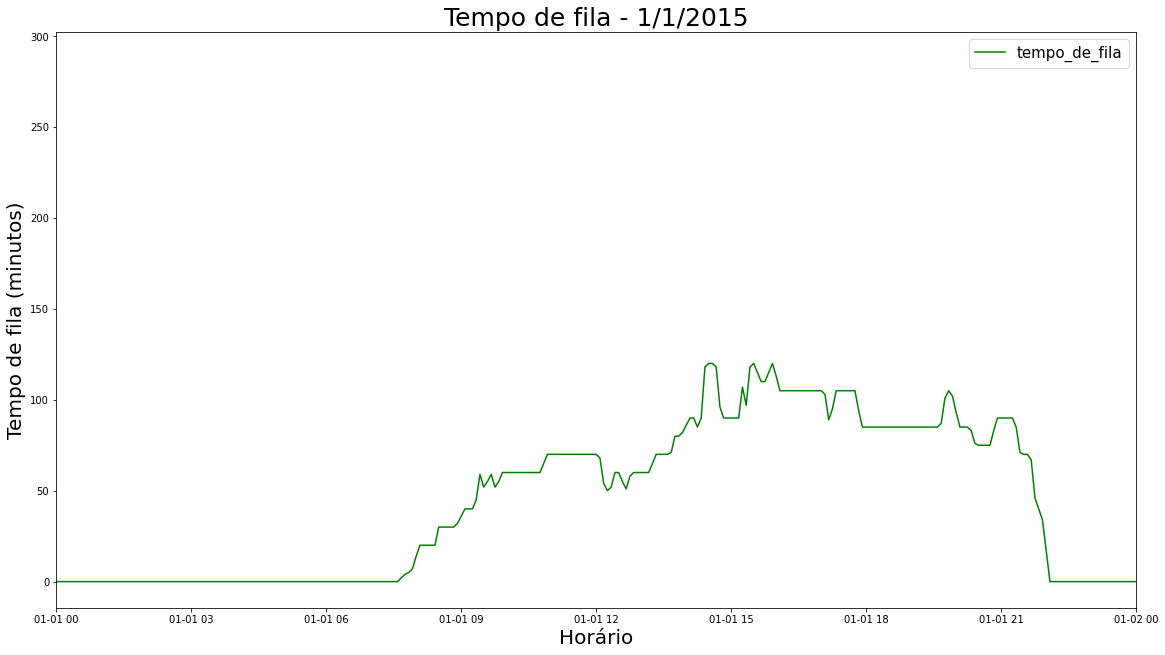

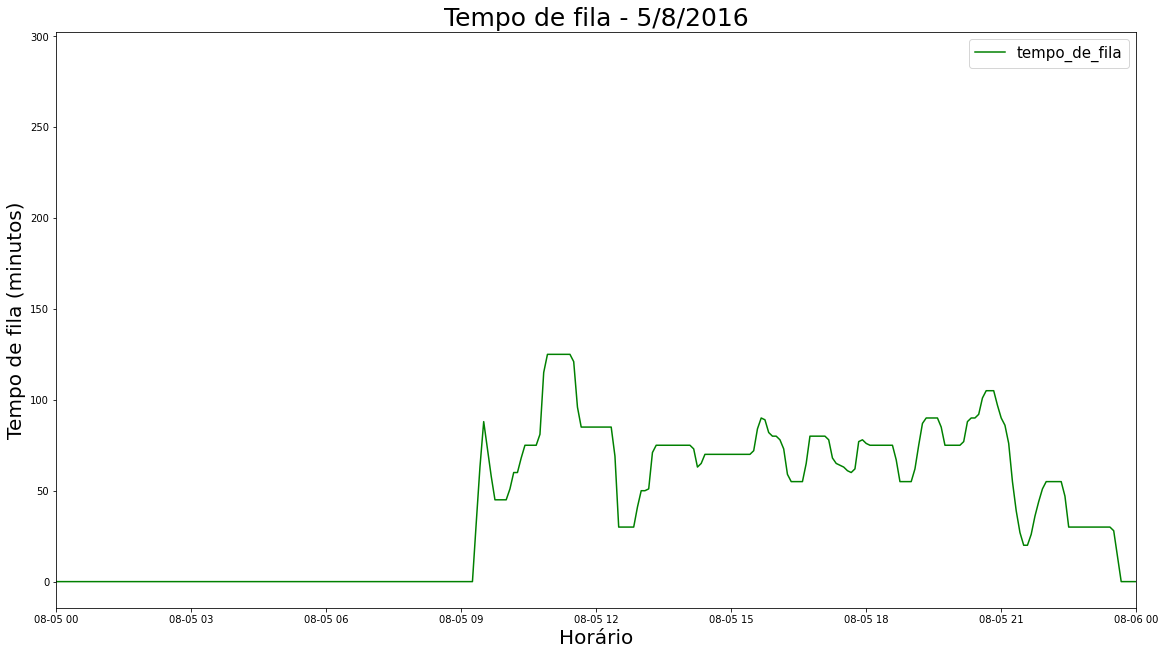

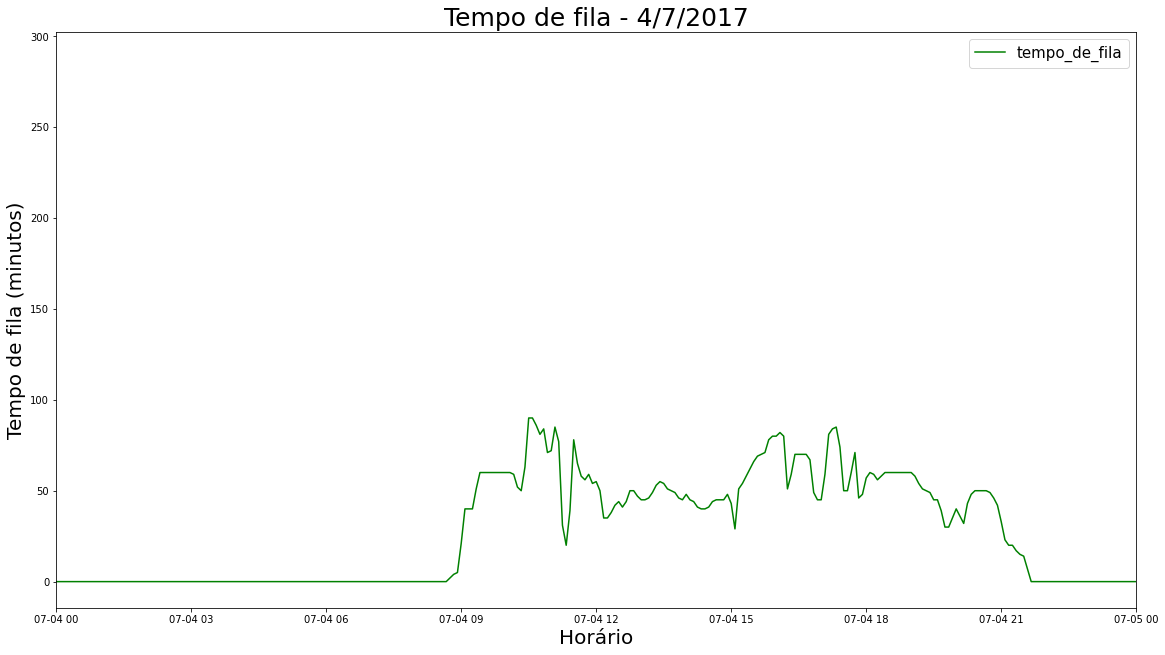

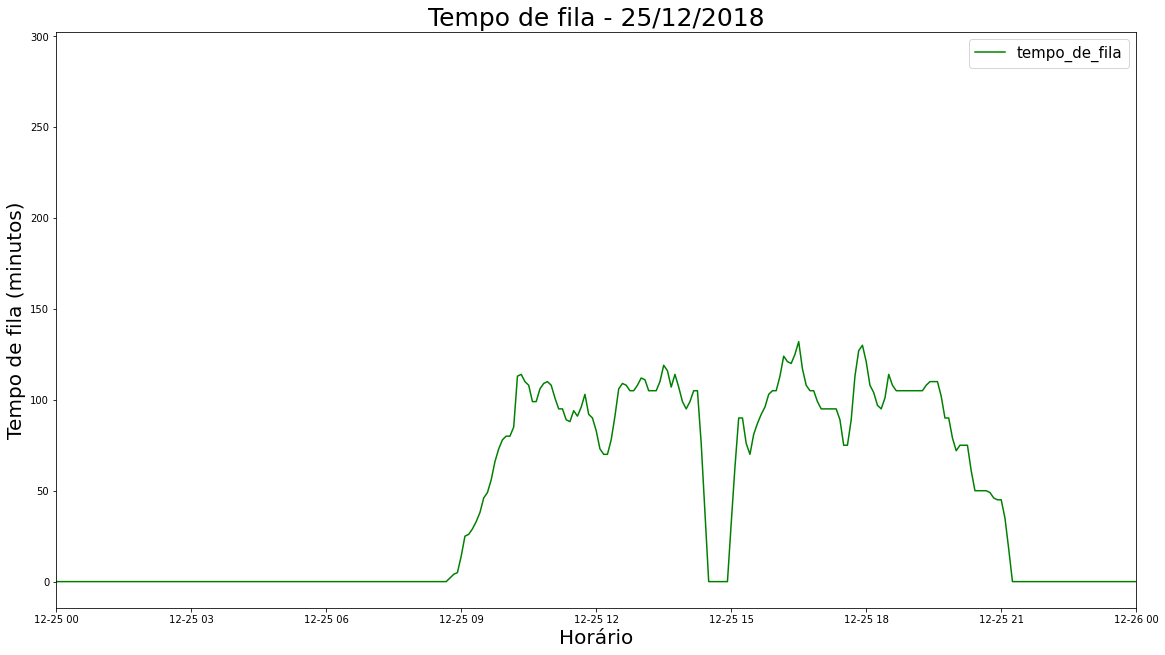

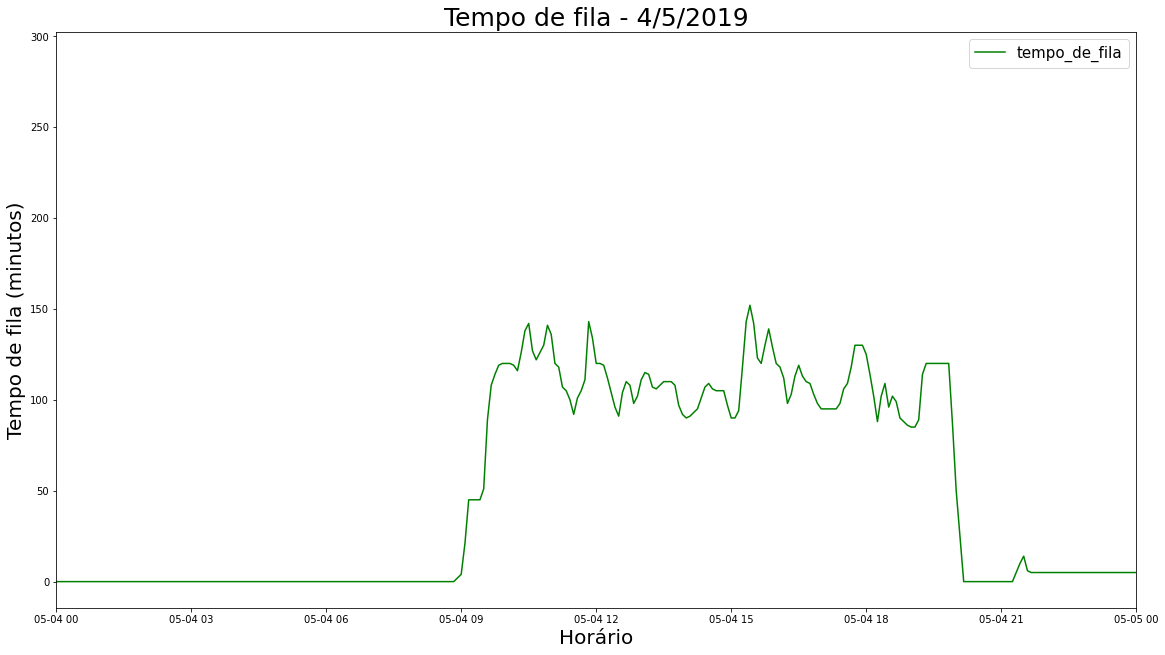

In [69]:
i = int(input('Quandos dias gostaria de analisar?'))
for i in range(0, i):
  print('Escolha uma data entre 01/01/2015 e 31/12/2019: ')
  d = int(input('Dia: '))
  m = int(input('Mês: '))
  y = int(input('Ano: '))
  data_escolhida = datetime(y, m, d)
  dia_seguinte = data_escolhida + timedelta(days=1)
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(base_df['data_e_hora'], base_df['tempo_de_fila'], color = 'g')

  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Tempo de fila - {}/{}/{}'.format(d, m, y), fontsize = 25)
  eixo.set_ylabel('Tempo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Horário', fontsize = 20)
  eixo.legend(['tempo_de_fila'], loc = 'upper right', fontsize = 15)

## <font color=green>GRÁFICOS DA VARIAÇÃO DOS TEMPOS MÁXIMOS E MÉDIOS DIÁRIOS AO LONGO DOS ANOS</font>
***

### <font color=green>Criando os DataFrame com as datas, os tempos máximos e médios diários</font>
***

In [40]:
datas = pd.date_range(start='1/1/2015', periods = 1826, freq = 'd')
index_days = range(0,1826)
maximos_df = base_df.groupby(base_df['data_e_hora'].dt.date)['tempo_de_fila'].max()
medias_df = base_df.groupby(base_df['data_e_hora'].dt.date)['tempo_de_fila'].mean()

In [41]:
base_agrup_dia_max = pd.DataFrame(index = index_days, columns = ['data', 'tempo_maximo'])
base_agrup_dia_max['data'] = datas
for i in index_days:
  base_agrup_dia_max.tempo_maximo[i] = maximos_df[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
base_agrup_dia_mean = pd.DataFrame(index = index_days, columns = ['data', 'medias'])
base_agrup_dia_mean['data'] = datas
for i in index_days:
  base_agrup_dia_mean.medias[i] = np.around(medias_df[i], decimals = 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### <font color=green>Plotando gráficos com a variação anual dos tempos máximos e médios de fila</font>
***

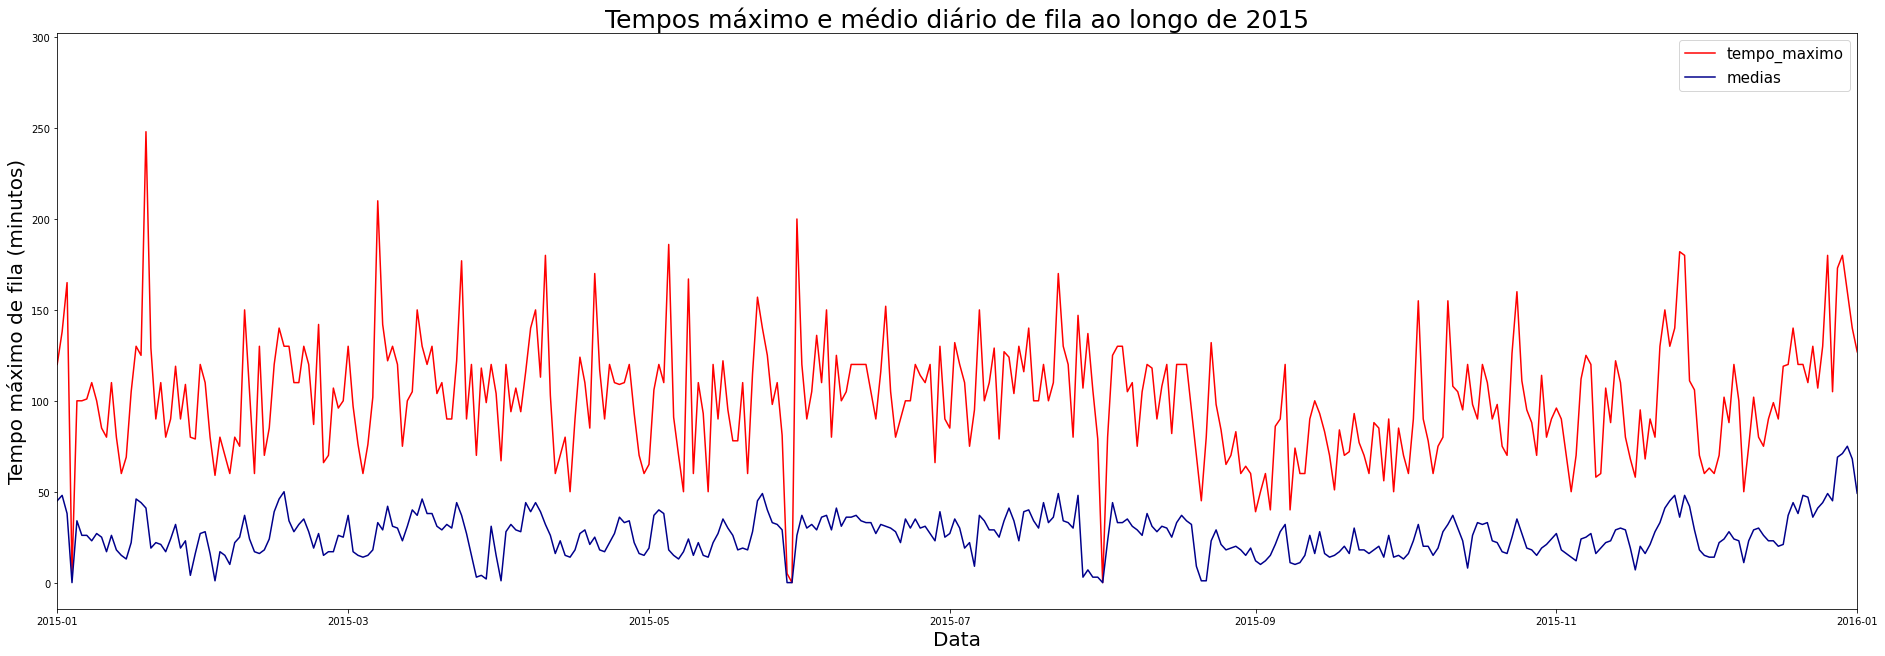

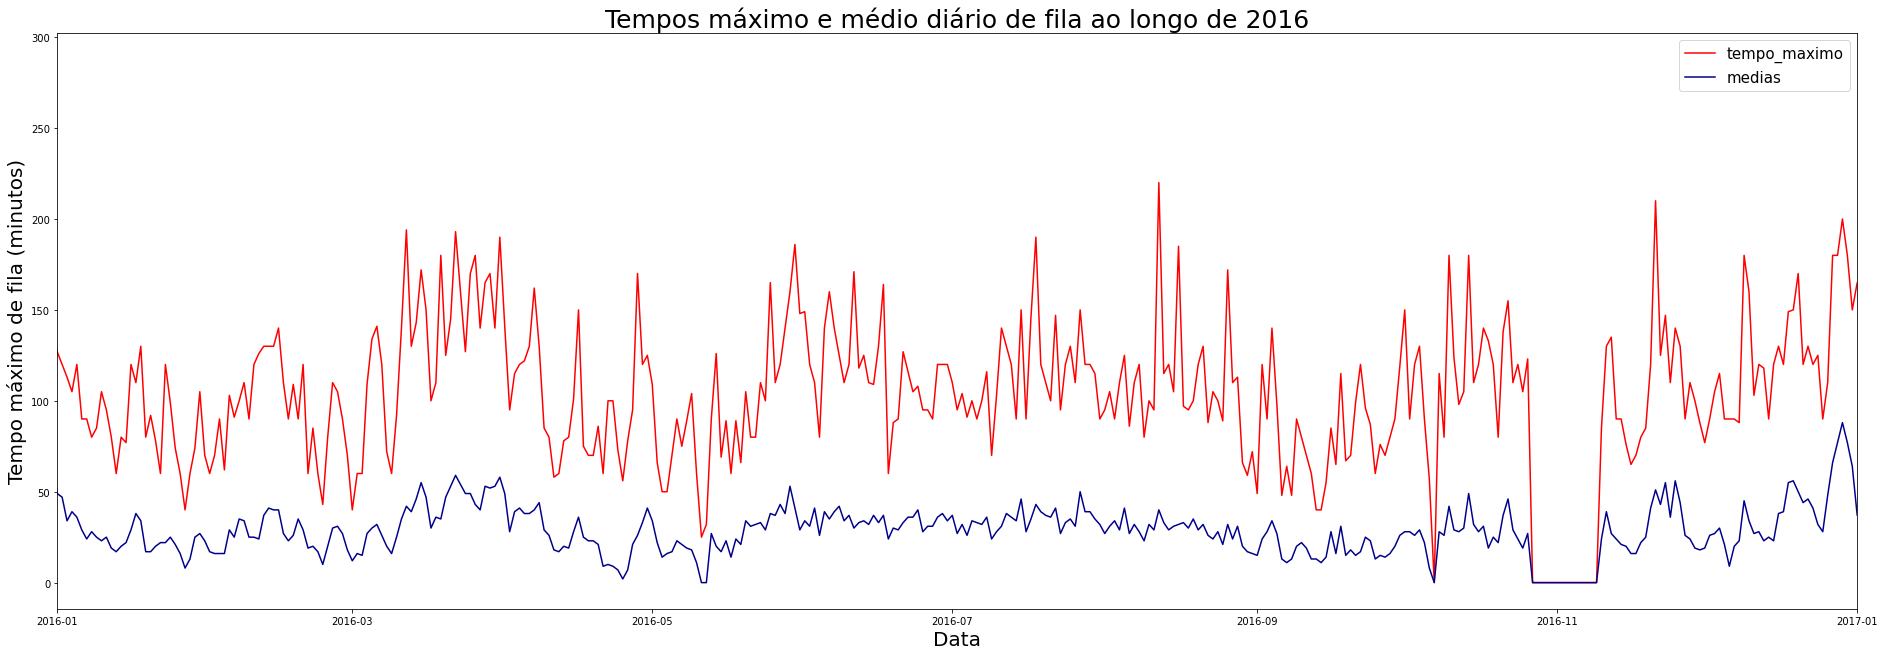

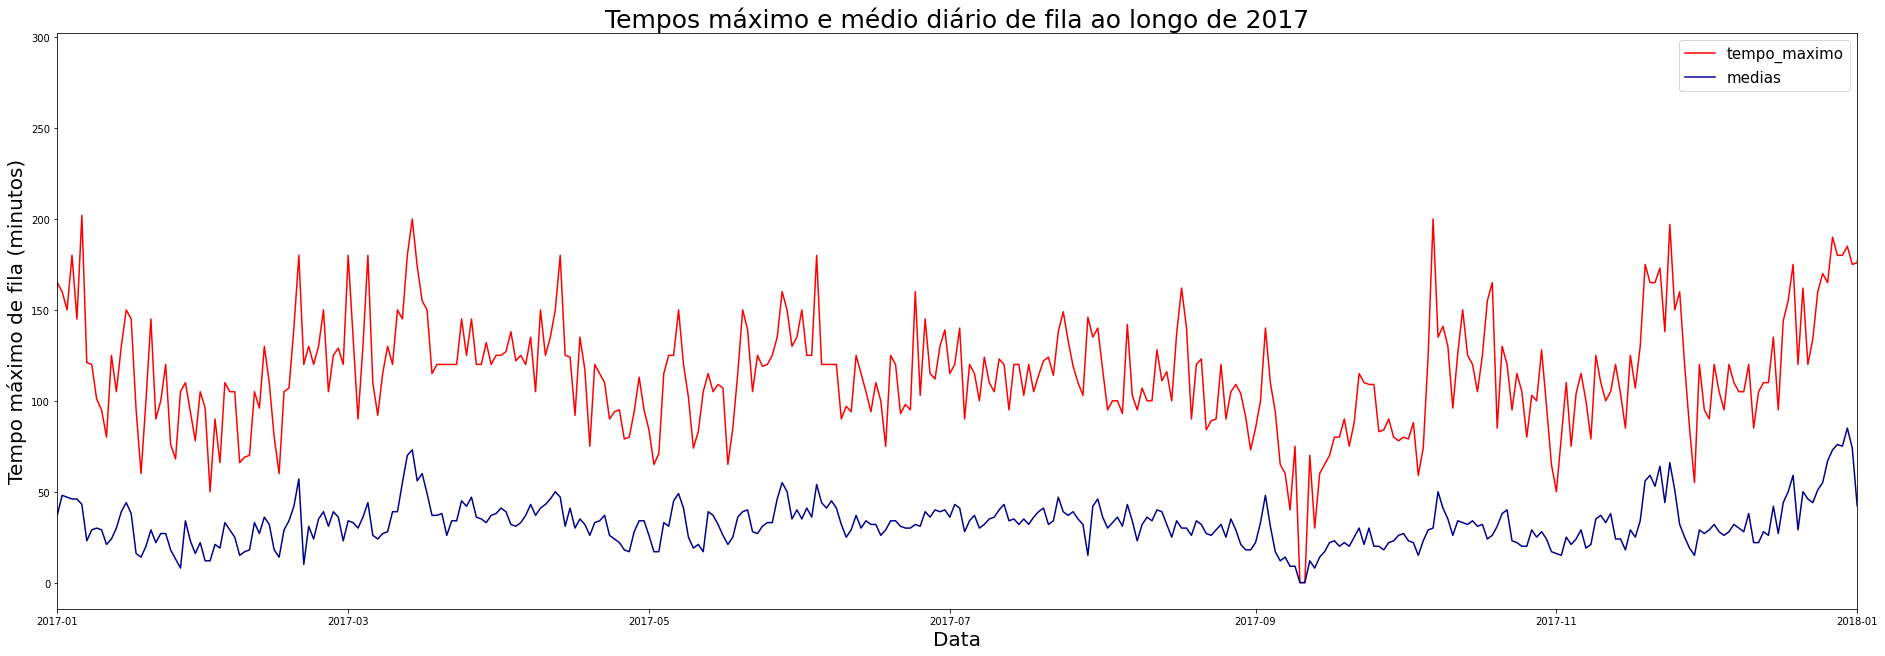

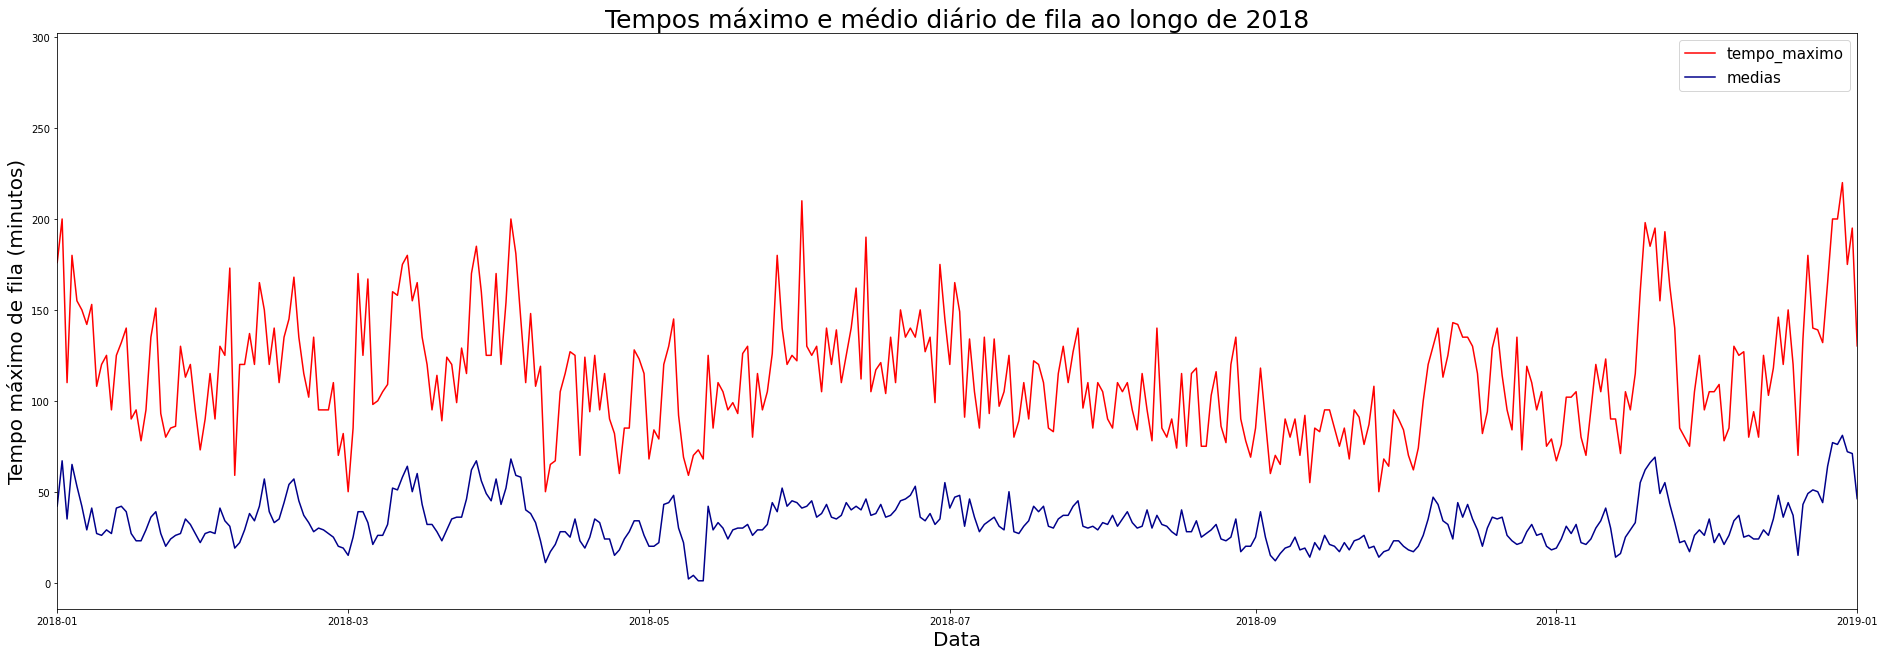

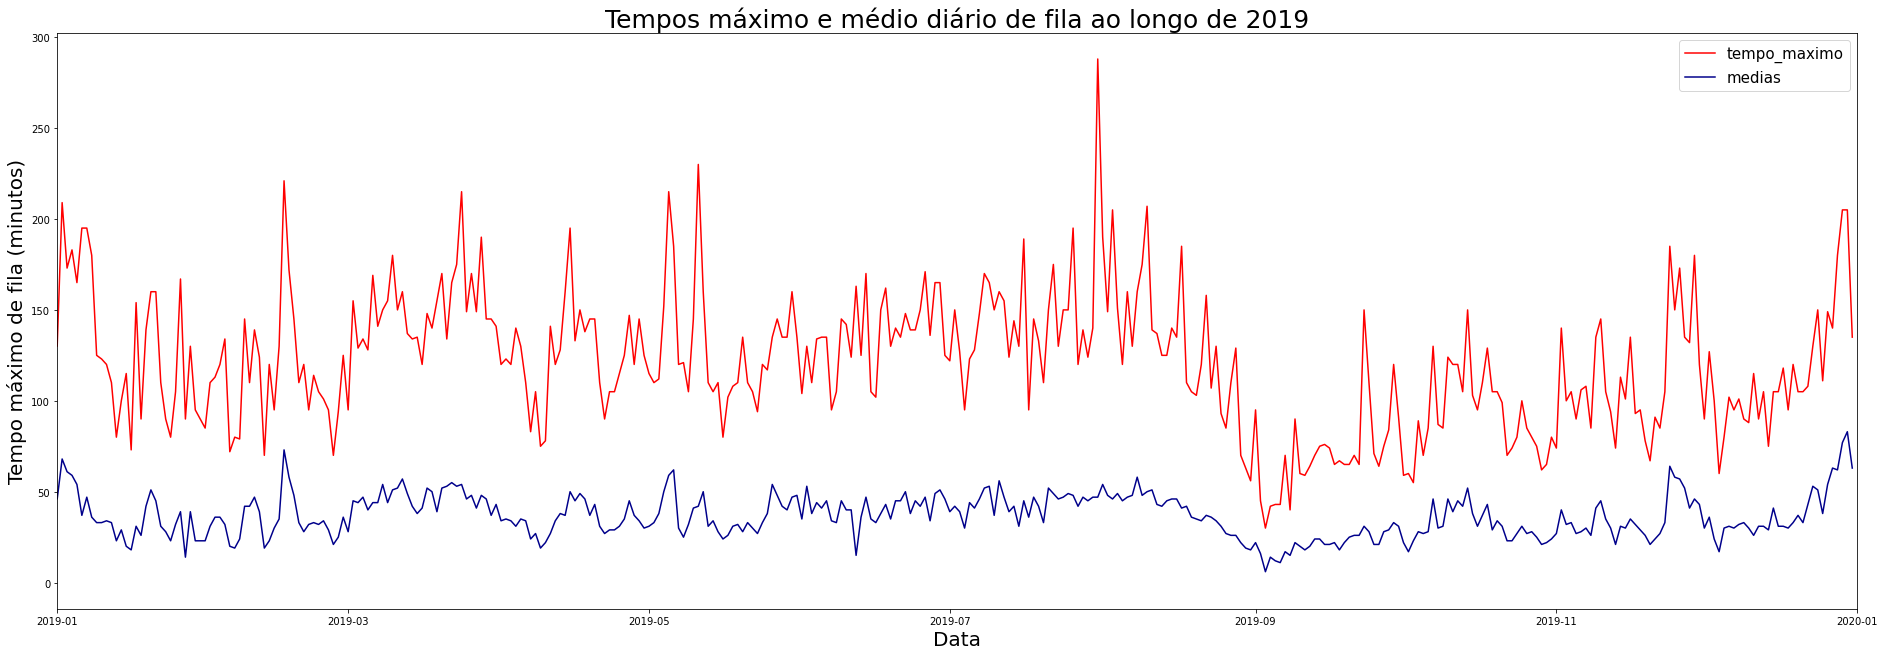

In [43]:
y = 2015
data_inicial = datetime(y, 1, 1)
data_final = data_inicial + timedelta(days=365)
fig = plt.figure(figsize = (25,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(base_agrup_dia_max['data'], base_agrup_dia_max['tempo_maximo'], color = 'r')
eixo.plot(base_agrup_dia_mean['data'], base_agrup_dia_mean['medias'], color = 'darkblue')

eixo.set_xlim(data_inicial,data_final)
eixo.set_title('Tempos máximo e médio diário de fila ao longo de {}'.format(y), fontsize = 25)
eixo.set_ylabel('Tempo máximo de fila (minutos)', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.legend(['tempo_maximo', 'medias'], loc = 'upper right', fontsize = 15)

y = 2016
data_inicial = datetime(y, 1, 1)
data_final = data_inicial + timedelta(days=366)
fig = plt.figure(figsize = (25,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(base_agrup_dia_max['data'], base_agrup_dia_max['tempo_maximo'], color = 'r')
eixo.plot(base_agrup_dia_mean['data'], base_agrup_dia_mean['medias'], color = 'darkblue')

eixo.set_xlim(data_inicial,data_final)
eixo.set_title('Tempos máximo e médio diário de fila ao longo de {}'.format(y), fontsize = 25)
eixo.set_ylabel('Tempo máximo de fila (minutos)', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.legend(['tempo_maximo', 'medias'], loc = 'upper right', fontsize = 15)

y = 2017
data_inicial = datetime(y, 1, 1)
data_final = data_inicial + timedelta(days=365)
fig = plt.figure(figsize = (25,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(base_agrup_dia_max['data'], base_agrup_dia_max['tempo_maximo'], color = 'r')
eixo.plot(base_agrup_dia_mean['data'], base_agrup_dia_mean['medias'], color = 'darkblue')

eixo.set_xlim(data_inicial,data_final)
eixo.set_title('Tempos máximo e médio diário de fila ao longo de {}'.format(y), fontsize = 25)
eixo.set_ylabel('Tempo máximo de fila (minutos)', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.legend(['tempo_maximo', 'medias'], loc = 'upper right', fontsize = 15)

y = 2018
data_inicial = datetime(y, 1, 1)
data_final = data_inicial + timedelta(days=365)
fig = plt.figure(figsize = (25,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(base_agrup_dia_max['data'], base_agrup_dia_max['tempo_maximo'], color = 'r')
eixo.plot(base_agrup_dia_mean['data'], base_agrup_dia_mean['medias'], color = 'darkblue')

eixo.set_xlim(data_inicial,data_final)
eixo.set_title('Tempos máximo e médio diário de fila ao longo de {}'.format(y), fontsize = 25)
eixo.set_ylabel('Tempo máximo de fila (minutos)', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.legend(['tempo_maximo', 'medias'], loc = 'upper right', fontsize = 15)

y = 2019
data_inicial = datetime(y, 1, 1)
data_final = data_inicial + timedelta(days=365)
fig = plt.figure(figsize = (25,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(base_agrup_dia_max['data'], base_agrup_dia_max['tempo_maximo'], color = 'r')
eixo.plot(base_agrup_dia_mean['data'], base_agrup_dia_mean['medias'], color = 'darkblue')

eixo.set_xlim(data_inicial,data_final)
eixo.set_title('Tempos máximo e médio diário de fila ao longo de {}'.format(y), fontsize = 25)
eixo.set_ylabel('Tempo máximo de fila (minutos)', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.legend(['tempo_maximo', 'medias'], loc = 'upper right', fontsize = 15)

# <font color=green>ANALISANDO TODAS AS ATRAÇÕES DISPONÍVEIS</font>
***

## <font color=green>Lendo os arquivos .csv</font>
***

In [2]:
mk_01 = pd.read_csv('splash_mountain.csv')
mk_02 = pd.read_csv('pirates_of_caribbean.csv')
mk_03 = pd.read_csv('7_dwarfs_train.csv')

ep_01 = pd.read_csv('soarin.csv')
ep_02 = pd.read_csv('spaceship_earth.csv')

hs_01 = pd.read_csv('rock_n_rollercoaster.csv')
hs_02 = pd.read_csv('slinky_dog.csv')
hs_03 = pd.read_csv('alien_saucers.csv')
hs_04 = pd.read_csv('toy_story_mania.csv')

ak_01 = pd.read_csv('kilimanjaro_safaris.csv')
ak_02 = pd.read_csv('dinosaur.csv')
ak_03 = pd.read_csv('expedition_everest.csv')
ak_04 = pd.read_csv('flight_of_passage.csv')
ak_05 = pd.read_csv('navi_river.csv')

metadata = pd.read_csv('metadata.csv')

## <font color=green>Dicionário com os nomes das atrações</font>
***

In [3]:
nome_das_atracoes = {1: 'Splash Mountain',
                     2: 'Pirates of Caribbean',
                     3: 'Seven Dwarfs Mine Train',
                     4: 'Soarin',
                     5: 'Spaceship Earth',
                     6: 'Rock n Roller Coaster',
                     7: 'Slinky Dog Dash',
                     8: 'Alien Saucers',
                     9: 'Toy Story Mania',
                     10: 'Kilimanjaro Safari',
                     11: 'Dinosaur',
                     12: 'Expedition Everest',
                     13: 'Avatar: Flight of Passage',
                     14: 'Navi River'}

## <font color=green>Dicionário com os dataframes das atrações</font>
***

In [4]:
datasets_das_atracoes = {1: mk_01,
                         2: mk_02,
                         3: mk_03,
                         4: ep_01,
                         5: ep_02,
                         6: hs_01,
                         7: hs_02,
                         8: hs_03,
                         9: hs_04,
                         10: ak_01,
                         11: ak_02,
                         12: ak_03,
                         13: ak_04,
                         14: ak_05}

## <font color=green>Tratamento dos dados brutos</font>
***

### <font color=green>Funções</font>
***

In [5]:
def remove_sactmin(dados):
  dados.drop(columns = ['SACTMIN'], inplace = True)
  return dados

def remove_dados_ausentes(dados):
  dados.dropna(inplace= True)
  return dados

def to_datetime(dados):
  dados['data_e_hora'] = pd.to_datetime(dados['datetime'])
  return dados

def cria_coluna_tempo_de_fila(dados):
  dados['tempo_de_fila'] = dados['SPOSTMIN']
  return dados

def remove_colunas(dados):
  dados.drop(columns = ['SPOSTMIN', 'date', 'datetime'], inplace = True)
  return dados

def reset_index(dados):
  dados.reset_index(drop = True, inplace = True)
  return dados

def coluna_apagar(dados):
  dados['apagar'] = 0
  return dados

def tratamento_dados(dados):
  remove_sactmin(dados)
  remove_dados_ausentes(dados)
  to_datetime(dados)
  cria_coluna_tempo_de_fila(dados)
  remove_colunas(dados)
  reset_index(dados)
  coluna_apagar(dados)

### <font color=green>Executando as funções para cada atração</font>
***

In [6]:
for i in range(1,15):
  tratamento_dados(datasets_das_atracoes[i])

### <font color=green>Filtrando e removendo tempos de fila menores que zero (-999.0)</font>
***

In [7]:
for i in range(1,15):
  filtro = datasets_das_atracoes[i].tempo_de_fila >= 0
  datasets_das_atracoes[i] = datasets_das_atracoes[i][filtro]

## <font color=green>Criando os DataFrames 'base' com os horários normalizados de 5 em 5 minutos</font>
***

In [8]:
bases = {}
instantes_5_em_5 = pd.date_range(start='1/1/2015', periods = 525888, freq = '5min')
for i in range(1,15): 
  bases[i] = pd.DataFrame(index = range(0,525888), columns = ['data_e_hora', 'tempo_de_fila', 'apagar'])
  bases[i]['data_e_hora'] = instantes_5_em_5
  bases[i]['tempo_de_fila'] = 0
  bases[i]['apagar'] = 0
  bases[i]['observacao'] = bases[i].index
  bases[i].set_index('observacao', inplace = True)

## <font color=green>Unindo o DataFrame 'base' aos DataFrames das atrações</font>
***

In [9]:
datasets_das_atracoes_2 = {}

In [10]:
for i in range(1,15):
  datasets_das_atracoes_2[i] = bases[i].append(datasets_das_atracoes[i])

### <font color=green>Ordenando de acordo com o instante (data/hora)</font>
***

In [11]:
for i in range(1,15):
  datasets_das_atracoes_2[i].sort_values(by=['data_e_hora'], inplace = True)

### <font color=green>Resetando índice</font>
***

In [12]:
for i in range(1,15):
  reset_index(datasets_das_atracoes_2[i])

### <font color=green>Selecionando linhas a serem apagadas</font>
***

In [13]:
for j in range(1,15):
  dados_e_base_df = datasets_das_atracoes_2[j]
  for i in range(0,len(dados_e_base_df)):
    if i != 0 and i != 1 and i != (len(dados_e_base_df) - 1) and i != (len(dados_e_base_df) - 2):
      if (dados_e_base_df.tempo_de_fila[i] == 0):
        c1 = (dados_e_base_df.tempo_de_fila[i + 1] != 0)
        c2 = (dados_e_base_df.tempo_de_fila[i - 1] != 0)
        c3 = (dados_e_base_df.tempo_de_fila[i + 2] != 0)
        c4 = (dados_e_base_df.tempo_de_fila[i - 2] != 0)
        if c1 or c2 or c3 or c4:
          dados_e_base_df.apagar[i] = 1
    datasets_das_atracoes_2[j] = dados_e_base_df
  print('Opa! Terminei a leitura da atração {}!'.format(nome_das_atracoes[j]))
print('Pronto!! Terminei toda a leitura!!')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Opa! Terminei a leitura da atração Splash Mountain!
Opa! Terminei a leitura da atração Pirates of Caribbean!
Opa! Terminei a leitura da atração Seven Dwarfs Mine Train!
Opa! Terminei a leitura da atração Soarin!
Opa! Terminei a leitura da atração Spaceship Earth!
Opa! Terminei a leitura da atração Rock n Roller Coaster!
Opa! Terminei a leitura da atração Slinky Dog Dash!
Opa! Terminei a leitura da atração Alien Saucers!
Opa! Terminei a leitura da atração Toy Story Mania!
Opa! Terminei a leitura da atração Kilimanjaro Safari!
Opa! Terminei a leitura da atração Dinosaur!
Opa! Terminei a leitura da atração Expedition Everest!
Opa! Terminei a leitura da atração Avatar: Flight of Passage!
Opa! Terminei a leitura da atração Navi River!
Pronto!! Terminei toda a leitura!!


### <font color=green>Apagando linhas de acordo com as condições dadas anteriormente</font>
***

In [14]:
for i in range(1,15):
  filtro2 = datasets_das_atracoes_2[i].apagar == 0
  datasets_das_atracoes_2[i] = datasets_das_atracoes_2[i][filtro2]

## <font color=green>Interpolação dos tempos de fila</font>
***

In [15]:
datasets_das_atracoes_3 = {}

In [16]:
for i in range(1,15):

  datasets_das_atracoes_3[i] = bases[i]

  X_interp = bases[i].data_e_hora
  X = datasets_das_atracoes_2[i].data_e_hora
  Y = datasets_das_atracoes_2[i].tempo_de_fila
  
  Y_interp = np.interp(X_interp, X, Y)

  datasets_das_atracoes_3[i].tempo_de_fila = np.around(Y_interp, decimals = 0)

## <font color=green>GRÁFICO DO TEMPO DE FILA EM 'N' DATAS SELECIONADAS PELO USUÁRIO</font>
***

Escolha uma atração para analizar6
Você escolheu a atração Rock n Roller Coaster
Quandos dias gostaria de analisar?2
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 6
Mês: 9
Ano: 2019
Escolha uma data entre 01/01/2015 e 31/12/2019: 
Dia: 25
Mês: 12
Ano: 2015


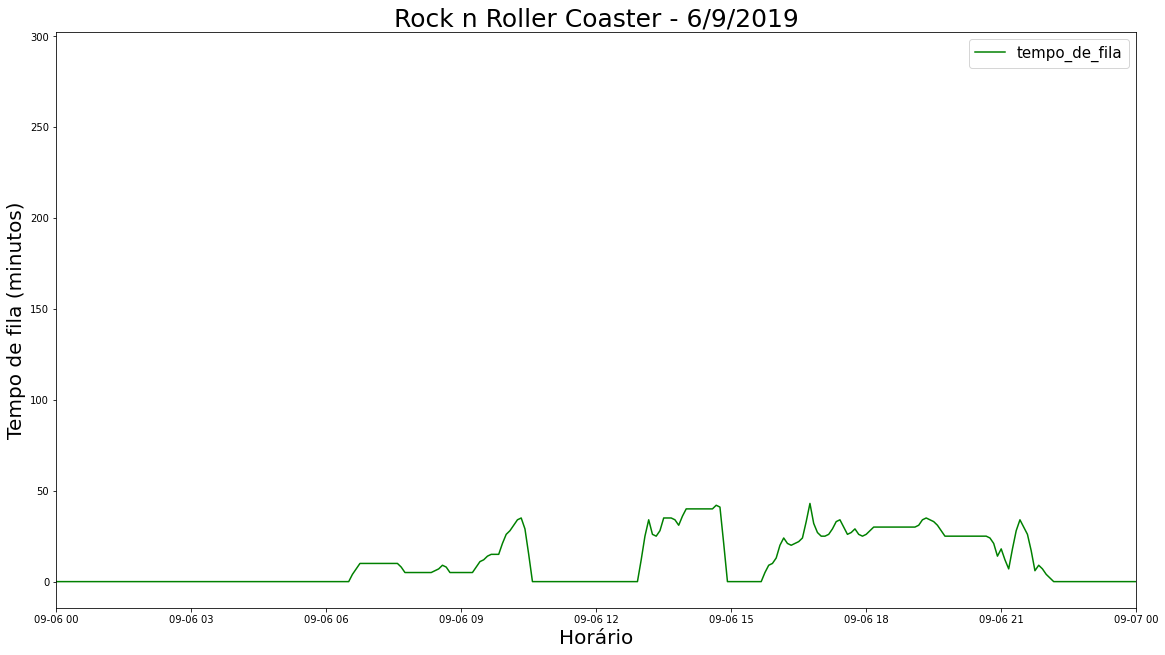

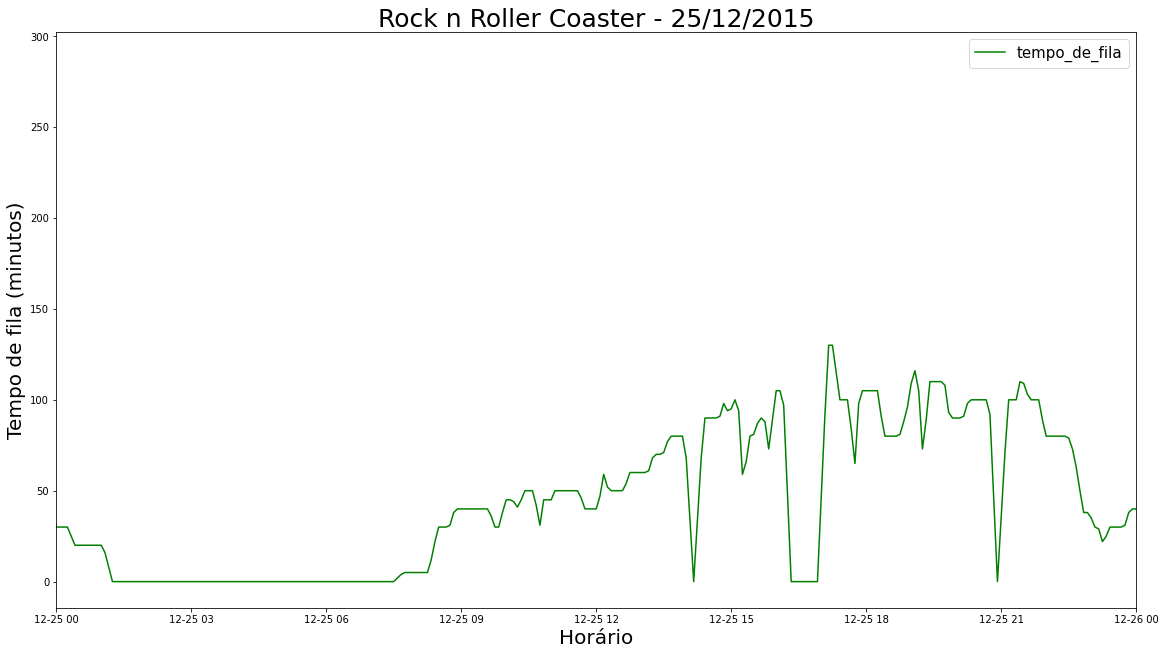

In [17]:
ride = int(input('Escolha uma atração para analizar'))
print('Você escolheu a atração {}'.format(nome_das_atracoes[ride]))
days = int(input('Quandos dias gostaria de analisar?'))
for days in range(0, days):
  print('Escolha uma data entre 01/01/2015 e 31/12/2019: ')
  d = int(input('Dia: '))
  m = int(input('Mês: '))
  y = int(input('Ano: '))
  data_escolhida = datetime(y, m, d)
  dia_seguinte = data_escolhida + timedelta(days=1)
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(datasets_das_atracoes_3[ride]['data_e_hora'], datasets_das_atracoes_3[ride]['tempo_de_fila'], color = 'g')

  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('{} - {}/{}/{}'.format(nome_das_atracoes[ride] , d, m, y), fontsize = 25)
  eixo.set_ylabel('Tempo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Horário', fontsize = 20)
  eixo.legend(['tempo_de_fila'], loc = 'upper right', fontsize = 15)

## <font color=green>GRÁFICOS DA VARIAÇÃO DOS TEMPOS MÁXIMOS E MÉDIOS DIÁRIOS AO LONGO DOS ANOS</font>
***

### <font color=green>Criando os DataFrame com as datas, os tempos máximos e médios diários</font>
***

In [18]:
tempos_diarios_maximos = {}
tempos_diarios_medios = {}

for i in range(1,15):
  tempos_diarios_maximos[i] = datasets_das_atracoes_3[i].groupby(datasets_das_atracoes_3[i]['data_e_hora'].dt.date)['tempo_de_fila'].max()
  tempos_diarios_medios[i] = datasets_das_atracoes_3[i].groupby(datasets_das_atracoes_3[i]['data_e_hora'].dt.date)['tempo_de_fila'].mean()

In [19]:
datas = pd.date_range(start='1/1/2015', periods = 1826, freq = 'd')
index_days = range(0,1826)

In [20]:
tempos_diarios_maximos_df = {}
tempos_diarios_medios_df = {}

for i in range(1,15):
  tempos_diarios_maximos_df[i] = pd.DataFrame(index = index_days, columns = ['data', 'tempo_maximo'])
  tempos_diarios_maximos_df[i]['data'] = datas
  for j in index_days:
    tempos_diarios_maximos_df[i].tempo_maximo[j] = tempos_diarios_maximos[i][j]

for i in range(1,15):
  tempos_diarios_medios_df[i] = pd.DataFrame(index = index_days, columns = ['data', 'tempo_medio'])
  tempos_diarios_medios_df[i]['data'] = datas
  for j in index_days:
    tempos_diarios_medios_df[i].tempo_medio[j] = np.around(tempos_diarios_medios[i][j], decimals = 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### <font color=green>Plotando gráficos com a variação anual dos tempos máximos e médios de fila</font>
***

Quantas gráficos anuais você quer visualizar?2
Escolha uma atração: 6
Escolha um ano de 2015 a 2019: 2015
Escolha uma atração: 6
Escolha um ano de 2015 a 2019: 2019


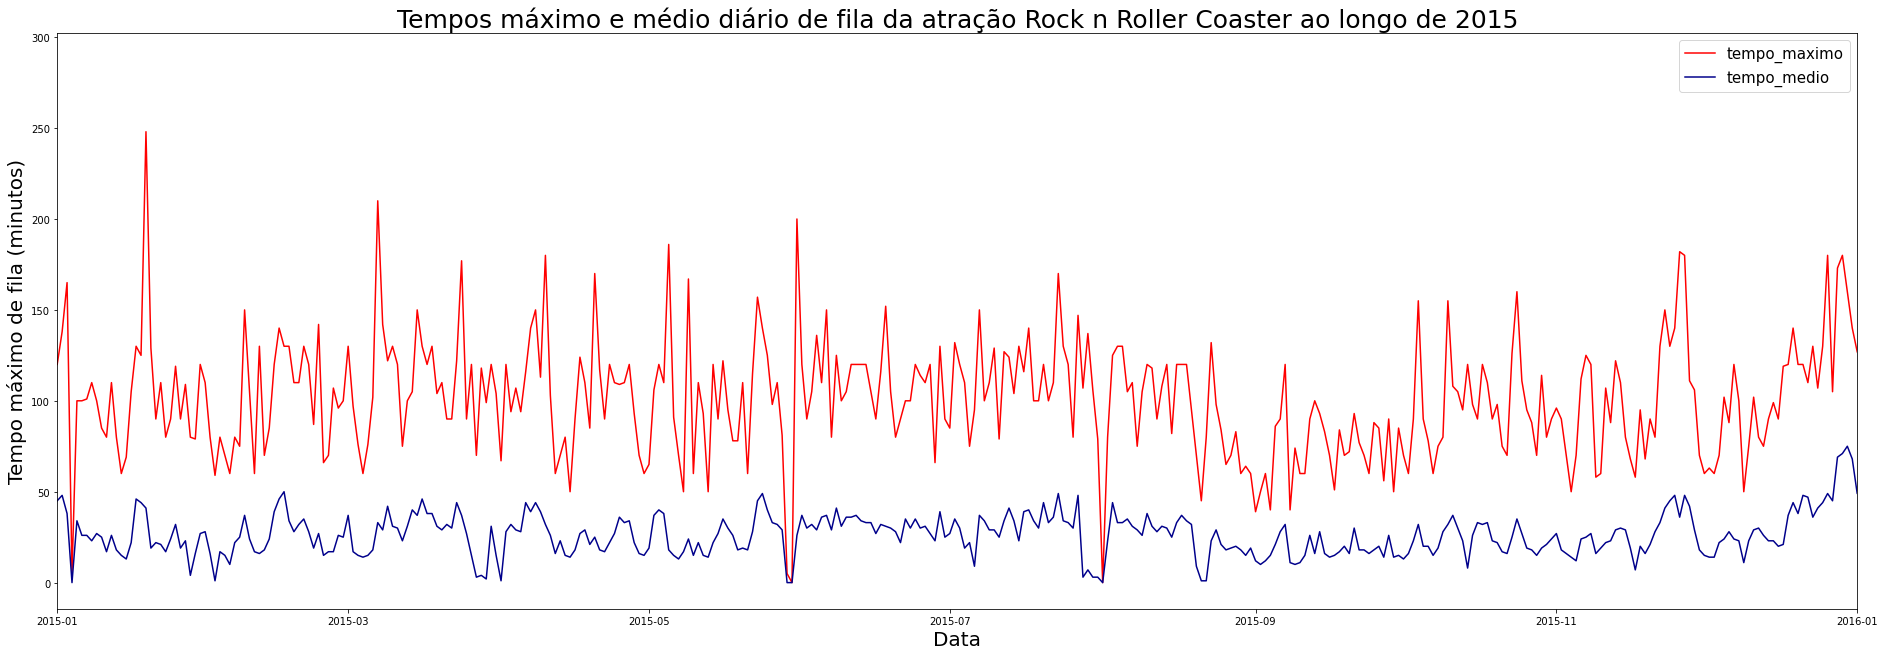

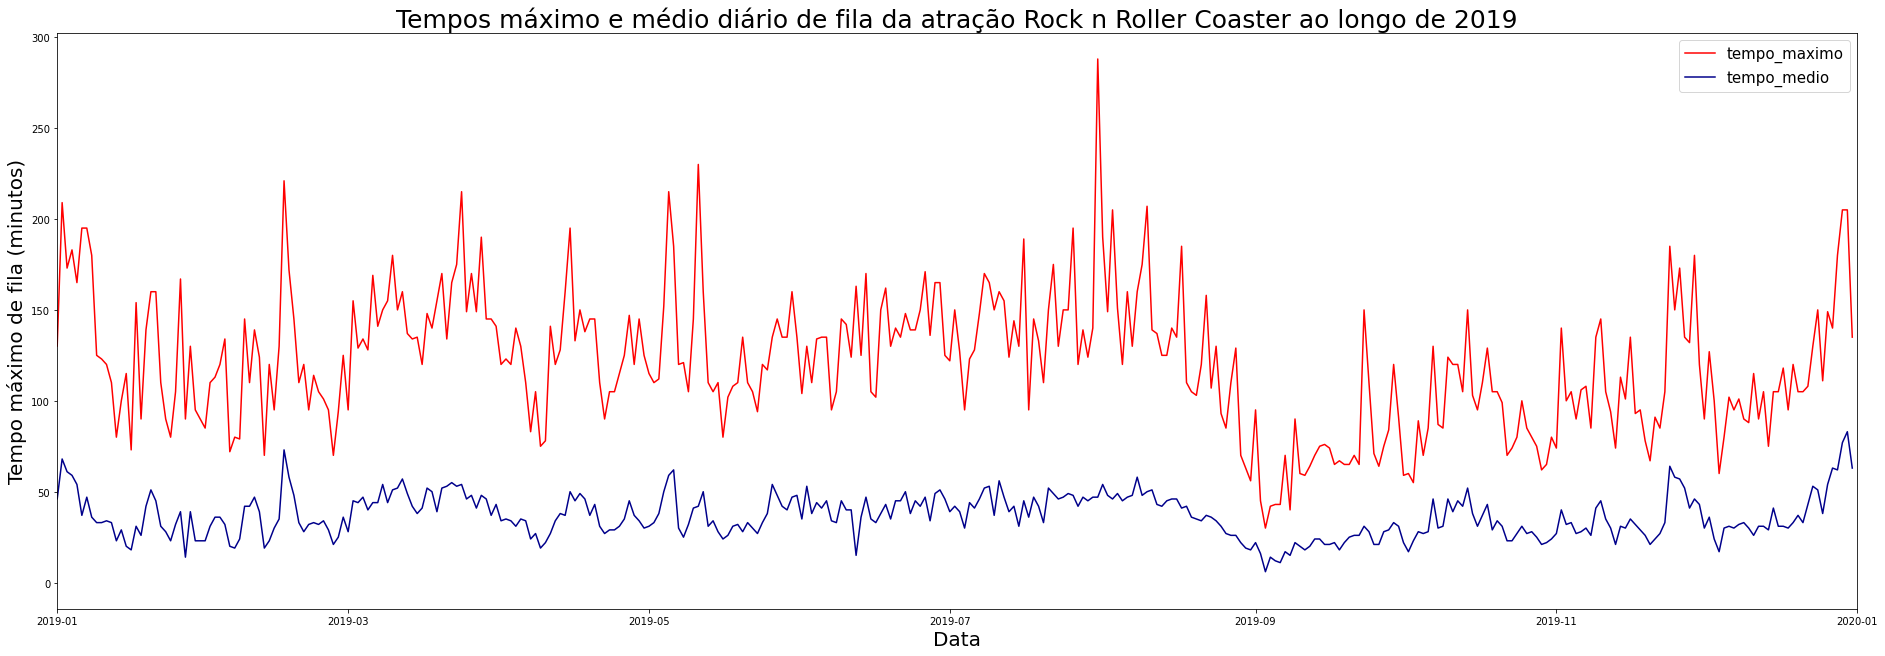

In [21]:
j = int(input('Quantas gráficos anuais você quer visualizar?'))
for j in range(1,(j+1)):
  i = int(input('Escolha uma atração: '))
  y = int(input('Escolha um ano de 2015 a 2019: '))
  
  data_inicial = datetime(y, 1, 1)
  data_final = data_inicial + timedelta(days=365)
  fig = plt.figure(figsize = (25,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(tempos_diarios_maximos_df[i]['data'], tempos_diarios_maximos_df[i]['tempo_maximo'], color = 'r')
  eixo.plot(tempos_diarios_medios_df[i]['data'], tempos_diarios_medios_df[i]['tempo_medio'], color = 'darkblue')

  eixo.set_xlim(data_inicial,data_final)
  eixo.set_title('Tempos máximo e médio diário de fila da atração {} ao longo de {}'.format(nome_das_atracoes[i], y), fontsize = 25)
  eixo.set_ylabel('Tempo máximo de fila (minutos)', fontsize = 20)
  eixo.set_xlabel('Data', fontsize = 20)
  eixo.legend(['tempo_maximo', 'tempo_medio'], loc = 'upper right', fontsize = 15)